In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel("selected_features.xlsx")

# Remove rows with critical missing values
df = df.dropna(subset=["Performance Score", "WinOrLose"])

# Create music listener groups
music_yes = df[df["Music Listened"] == 1].copy()
music_no = df[df["Music Listened"] == 0].copy()

# Show counts
print("Music Listeners:", len(music_yes))
print("Non-Music Listeners:", len(music_no))


Music Listeners: 247
Non-Music Listeners: 247


**1. Analyze Reaction Time by Genre**

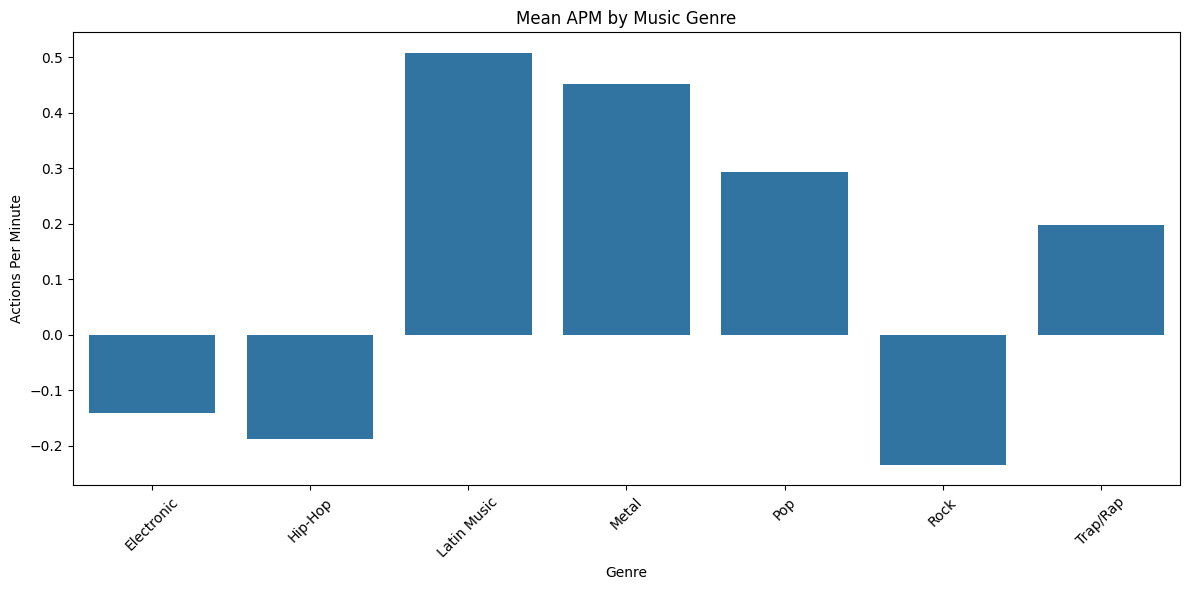

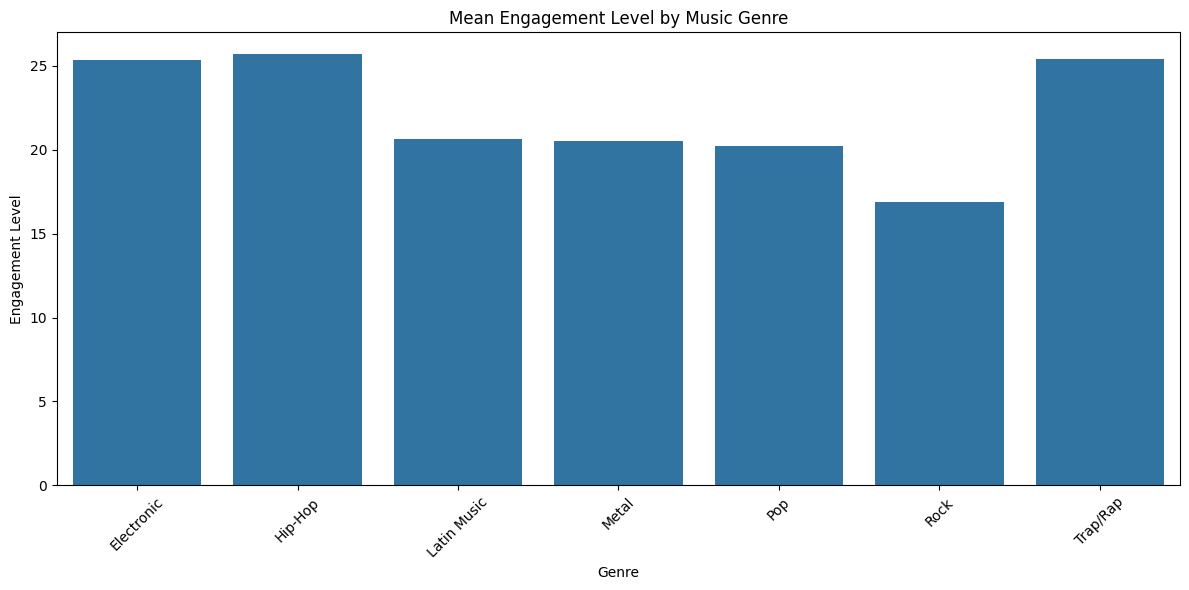

         Genre  Mean APM  Mean Engagement  Count
0   Electronic -0.140959        25.352632     38
1      Hip-Hop -0.187279        25.691176     34
2  Latin Music  0.507714        20.644000     25
3        Metal  0.451185        20.502857     35
4          Pop  0.293098        20.220513     39
5         Rock -0.234837        16.884615     26
6     Trap/Rap  0.198210        25.390909     22


In [ ]:
# Genre vs Reaction Time (Bar Plot & Stats)
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary genre columns
genres = [
    'Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
    'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap'
]

reaction_stats = []

# Compare average APM and Engagement_Level by genre
for genre in genres:
    group = music_yes[music_yes[genre] == 1]
    reaction_stats.append({
        'Genre': genre.replace("Genre_", "").replace(" (Perreo)", ""),
        'Mean APM': group['APM'].mean(),
        'Mean Engagement': group['Engagement_Level'].mean(),
        'Count': len(group)
    })

# Convert to DataFrame
reaction_df = pd.DataFrame(reaction_stats)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=reaction_df, x='Genre', y='Mean APM')
plt.title('Mean APM by Music Genre')
plt.ylabel('Actions Per Minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=reaction_df, x='Genre', y='Mean Engagement')
plt.title('Mean Engagement Level by Music Genre')
plt.ylabel('Engagement Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print numeric stats
print(reaction_df)


In [ ]:
# Total number of music listeners
total_listeners = 247

# Count of music listeners per genre
genre_counts = {
    'Electronic': 38,
    'Hip-Hop': 34,
    'Latin Music': 25,
    'Metal': 35,
    'Pop': 39,
    'Rock': 26,
    'Trap/Rap': 22
}

# Calculate percentage for each genre
genre_percentages = {genre: (count / total_listeners) * 100 for genre, count in genre_counts.items()}

# Create a DataFrame for the table
genre_percentage_df = pd.DataFrame(list(genre_percentages.items()), columns=['Género Musical', 'Porcentaje'])

# Print the table
print(genre_percentage_df)


  Género Musical  Porcentaje
0     Electronic   15.384615
1        Hip-Hop   13.765182
2    Latin Music   10.121457
3          Metal   14.170040
4            Pop   15.789474
5           Rock   10.526316
6       Trap/Rap    8.906883


**2. Analyze Strategic Decision-Making Under Pressure**


Tilt_Factor
Mean (Music): 9.7632
Mean (No Music): 9.7296
T-Statistic: 0.0338
P-Value: 0.9730

Clutch_Factor
Mean (Music): 3.0151
Mean (No Music): 2.5036
T-Statistic: 1.6189
P-Value: 0.1062


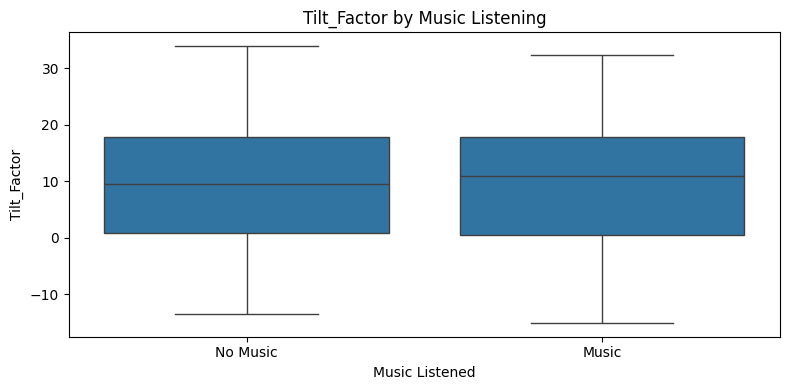

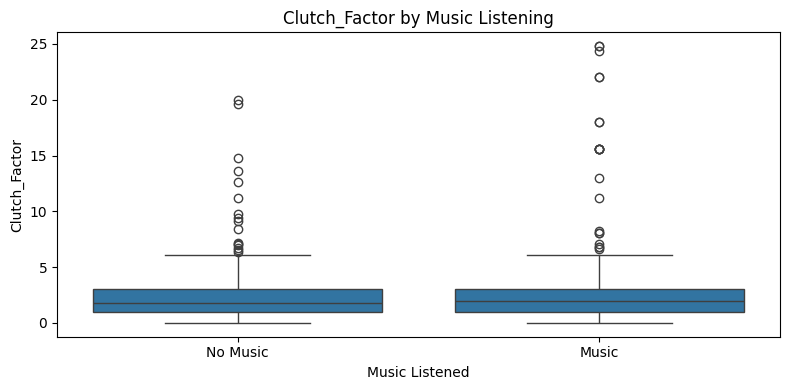

In [ ]:
# Music vs No-Music (T-Test + Boxplots)
from scipy.stats import ttest_ind

# T-tests
metrics = ['Tilt_Factor', 'Clutch_Factor']
results = {}

for metric in metrics:
    t_stat, p_val = ttest_ind(music_yes[metric], music_no[metric], equal_var=False)
    results[metric] = {
        "Mean (Music)": music_yes[metric].mean(),
        "Mean (No Music)": music_no[metric].mean(),
        "T-Statistic": t_stat,
        "P-Value": p_val
    }

# Print summary
for metric, vals in results.items():
    print(f"\n{metric}")
    for k, v in vals.items():
        print(f"{k}: {v:.4f}")

# Visualization
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Music Listened", y=metric)
    plt.title(f'{metric} by Music Listening')
    plt.xticks([0, 1], ["No Music", "Music"])
    plt.tight_layout()
    plt.show()


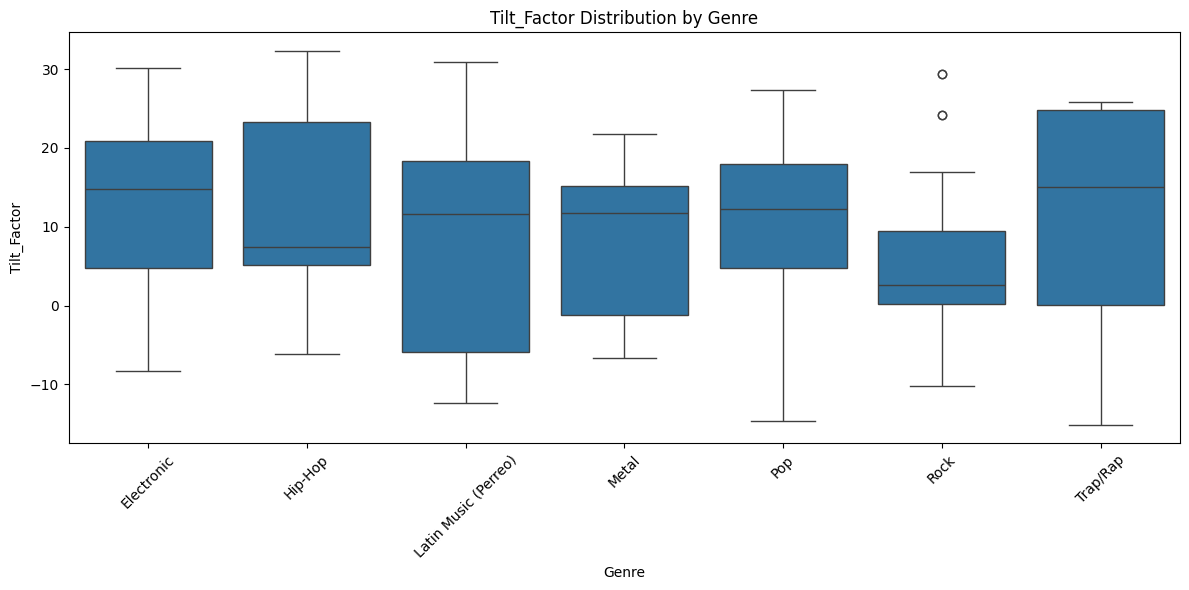

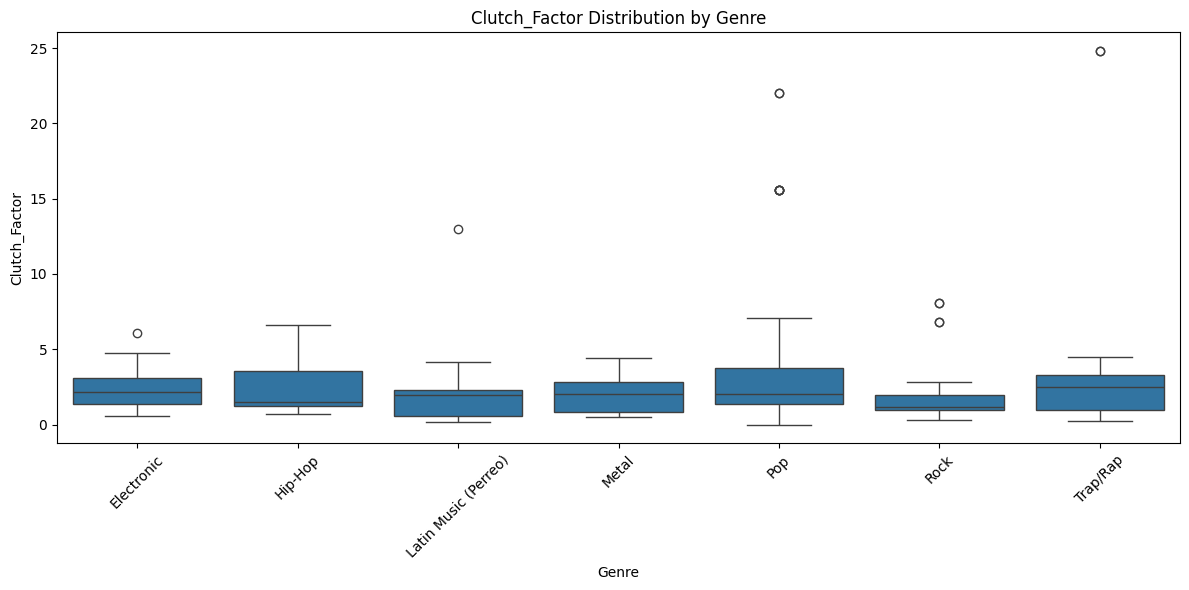

In [ ]:
# Per-Genre Analysis (Boxplot Comparison)

# Visualize Tilt and Clutch per genre
for metric in ['Tilt_Factor', 'Clutch_Factor']:
    genre_melted = music_yes.melt(id_vars=[metric], value_vars=genres)
    genre_melted = genre_melted[genre_melted['value'] == 1]
    genre_melted['Genre'] = genre_melted['variable'].str.replace("Genre_", "")

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=genre_melted, x='Genre', y=metric)
    plt.title(f'{metric} Distribution by Genre')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**3. Compare Music Listeners vs Non-Listeners**

In [ ]:
# T-Test Comparison on Performance Metrics

performance_metrics = ['Performance Score', 'GPM', 'XPM']
comparison_results = {}

for metric in performance_metrics:
    t_stat, p_val = ttest_ind(music_yes[metric], music_no[metric], equal_var=False)
    comparison_results[metric] = {
        'Mean (Music)': music_yes[metric].mean(),
        'Mean (No Music)': music_no[metric].mean(),
        'T-Statistic': t_stat,
        'P-Value': p_val
    }

# Print results
print("\n T-Test Results for Performance Metrics:")
for metric, vals in comparison_results.items():
    print(f"\n{metric}")
    for k, v in vals.items():
        print(f"{k}: {v:.4f}")



 T-Test Results for Performance Metrics:

Performance Score
Mean (Music): 12.0658
Mean (No Music): 12.2184
T-Statistic: -0.1301
P-Value: 0.8965

GPM
Mean (Music): -0.0082
Mean (No Music): 0.0505
T-Statistic: -0.6355
P-Value: 0.5254

XPM
Mean (Music): -0.0233
Mean (No Music): 0.0236
T-Statistic: -0.5186
P-Value: 0.6043


In [ ]:
# Classify Win/Loss Separately for Music & No-Music
from sklearn.model_selection import GridSearchCV
def classify_group(df_group, label):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, accuracy_score

    # Features to use
    features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Engagement_Level']
    X = df_group[features]
    y = df_group['WinOrLose']

    # Scale and split
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

     # Grid search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    print(f"\n Classification Report ({label}):")
    print("Best Parameters:", grid_search.best_params_)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Run for both groups
classify_group(music_yes, "Music Listeners")
classify_group(music_no, "Non-Music Listeners")


 Classification Report (Music Listeners):
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Test Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.96      0.86      0.91        29

    accuracy                           0.90        50
   macro avg       0.90      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50


 Classification Report (Non-Music Listeners):
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Test Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.89      0.74      0.81        23

    accuracy                           0.84        50
   macro avg       0.85      0.83      0.84        50
weighted avg       0.85      0.84      0.84        50



**4. Genre-Specific Performance Correlation**

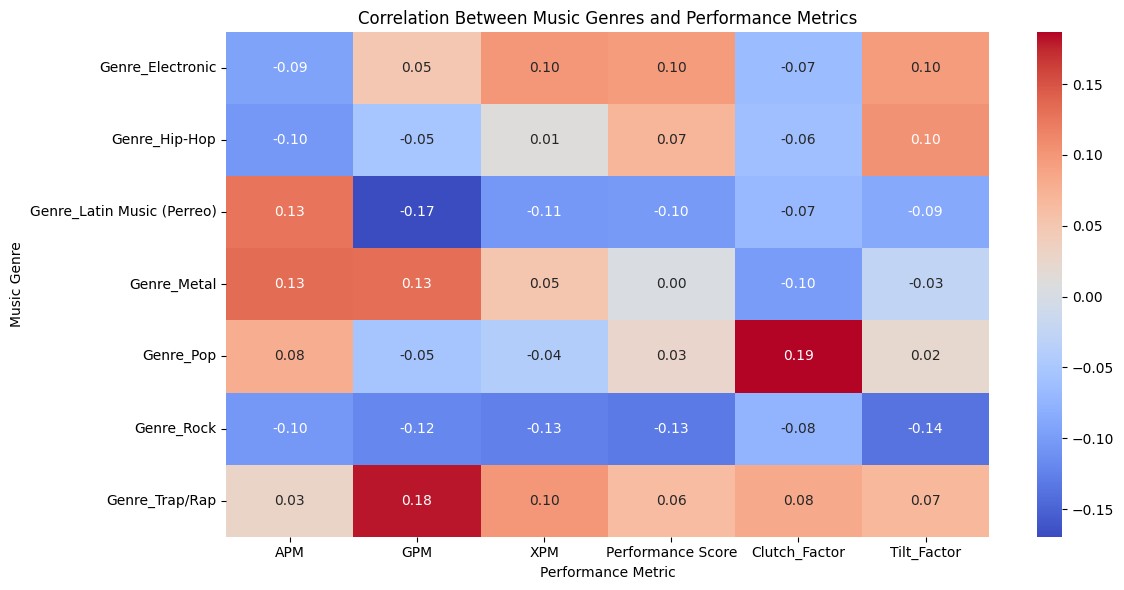

In [ ]:
# Genre vs. Performance Correlation (Heatmap)

performance_cols = ['APM', 'GPM', 'XPM', 'Performance Score', 'Clutch_Factor', 'Tilt_Factor']
genre_cols = genres  # from before

# Only music listeners
genre_perf_df = music_yes[genre_cols + performance_cols]

# Correlation matrix
corr_matrix = genre_perf_df.corr().loc[genre_cols, performance_cols]

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Music Genres and Performance Metrics")
plt.ylabel("Music Genre")
plt.xlabel("Performance Metric")
plt.tight_layout()
plt.show()


In [ ]:
# Statistical Significance
from scipy.stats import pearsonr

# Create table with correlation + p-values
corr_data = []
for genre in genre_cols:
    for perf in performance_cols:
        corr, p = pearsonr(genre_perf_df[genre], genre_perf_df[perf])
        corr_data.append({
            'Genre': genre.replace("Genre_", ""),
            'Performance': perf,
            'Correlation': round(corr, 3),
            'P-Value': round(p, 4)
        })

corr_df = pd.DataFrame(corr_data)
significant = corr_df[corr_df['P-Value'] < 0.05]
print("\n Significant Correlations (p < 0.05):")
print(significant)



 Significant Correlations (p < 0.05):
                   Genre        Performance  Correlation  P-Value
12  Latin Music (Perreo)                APM        0.127   0.0460
13  Latin Music (Perreo)                GPM       -0.169   0.0076
18                 Metal                APM        0.133   0.0372
19                 Metal                GPM        0.132   0.0378
28                   Pop      Clutch_Factor        0.187   0.0033
32                  Rock                XPM       -0.126   0.0477
33                  Rock  Performance Score       -0.131   0.0394
35                  Rock        Tilt_Factor       -0.136   0.0322
37              Trap/Rap                GPM        0.181   0.0044


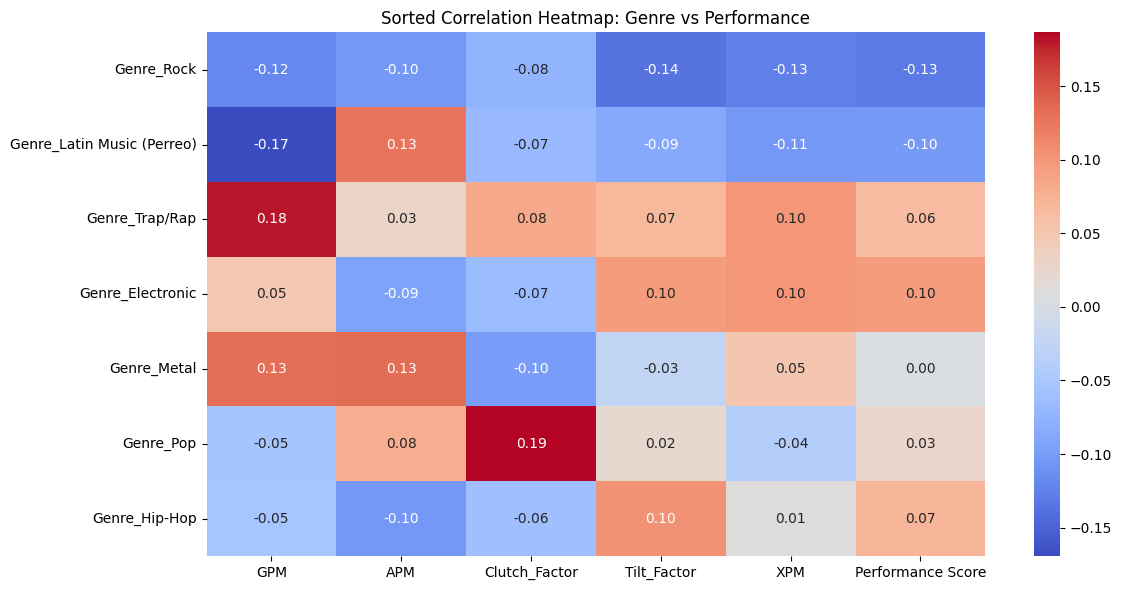

In [ ]:
# Sort genres by sum of absolute correlations
sorted_genres = corr_matrix.abs().sum(axis=1).sort_values(ascending=False).index
sorted_metrics = corr_matrix.abs().sum(axis=0).sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix.loc[sorted_genres, sorted_metrics], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sorted Correlation Heatmap: Genre vs Performance")
plt.tight_layout()
plt.show()


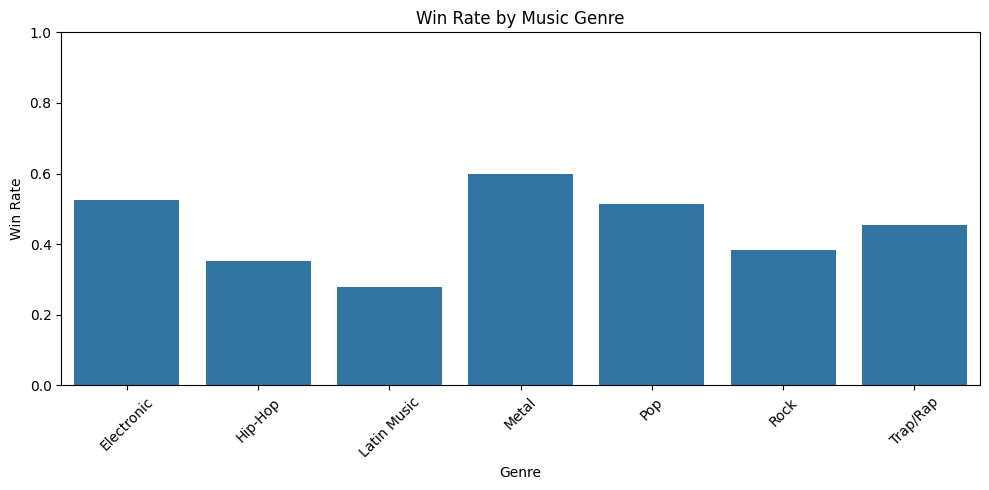


 Genre Win Rates:
         Genre  Win Rate  Players
0   Electronic  0.526316       38
1      Hip-Hop  0.352941       34
2  Latin Music  0.280000       25
3        Metal  0.600000       35
4          Pop  0.512821       39
5         Rock  0.384615       26
6     Trap/Rap  0.454545       22


In [ ]:
# Win Rate by Genre (Bar Plot)

genre_win_stats = []

for genre in genres:
    listeners = music_yes[music_yes[genre] == 1]
    win_rate = listeners['WinOrLose'].mean()  # 1 = win, 0 = loss
    genre_win_stats.append({
        "Genre": genre.replace("Genre_", "").replace(" (Perreo)", ""),
        "Win Rate": win_rate,
        "Players": len(listeners)
    })

genre_win_df = pd.DataFrame(genre_win_stats)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=genre_win_df, x="Genre", y="Win Rate")
plt.ylim(0, 1)
plt.title("Win Rate by Music Genre")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n Genre Win Rates:")
print(genre_win_df)


**5. Comparison of Classification Models vs. Regression Models**

In [ ]:
# Comparison for Both
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
import pandas as pd

#  Features & Target Setup
features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Engagement_Level']

# Clean up data
df_model = df.dropna(subset=features + ['WinOrLose', 'Performance Score'])
X = df_model[features]
y_class = df_model['WinOrLose']
y_reg = df_model['Performance Score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)


In [ ]:
# Classification Models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def classify_models(df_group, label):
    # Features to use
    features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Engagement_Level']
    X = df_group[features]
    y = df_group['WinOrLose']

    # Scale and split
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Logistic Regression
    log_param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    }

    log_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=log_param_grid, cv=5)
    log_grid.fit(X_train, y_train)
    log_best = log_grid.best_estimator_
    y_pred_log = log_best.predict(X_test)

    print(f"\nLogistic Regression Classification Report ({label}):")
    print("Best Parameters:", log_grid.best_params_)
    print(classification_report(y_test, y_pred_log))
    print("Accuracy:", accuracy_score(y_test, y_pred_log))

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=42)
    rf_param_dist = {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [5, 10, 15, 20, 25],
        'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 5, 10]
    }

    rf_random_search = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=rf_param_dist,
        n_iter=100,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    rf_random_search.fit(X_train, y_train)
    y_pred_rf_random = rf_random_search.best_estimator_.predict(X_test)

    print(f"\nRandom Forest Classification Report ({label}):")
    print("Best Parameters:", rf_random_search.best_params_)
    print(classification_report(y_test, y_pred_rf_random))
    print("Accuracy:", accuracy_score(y_test, y_pred_rf_random))

# Run for both groups
classify_models(music_yes, "Music Listeners")
classify_models(music_no, "Non-Music Listeners")


Logistic Regression Classification Report (Music Listeners):
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        21
           1       0.86      0.62      0.72        29

    accuracy                           0.72        50
   macro avg       0.74      0.74      0.72        50
weighted avg       0.76      0.72      0.72        50

Accuracy: 0.72

Random Forest Classification Report (Music Listeners):
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.96      0.86      0.91        29

    accuracy                           0.90        50
   macro avg       0.90      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50

Accuracy: 0.9

Logisti


--- Linear Regression (Music Listeners) ---
R²: 0.9726052556784505
MSE: 4.538201834542476
MAE: 1.8419907708850503
Coefficients:
APM: -0.2977
GPM: 1.1639
XPM: -0.0748
Clutch_Factor: 0.5861
Tilt_Factor: 11.9791

--- Random Forest (Music Listeners) ---
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
R²: 0.9788226333547669
MSE: 3.5082336608841724
MAE: 1.2501969628210603


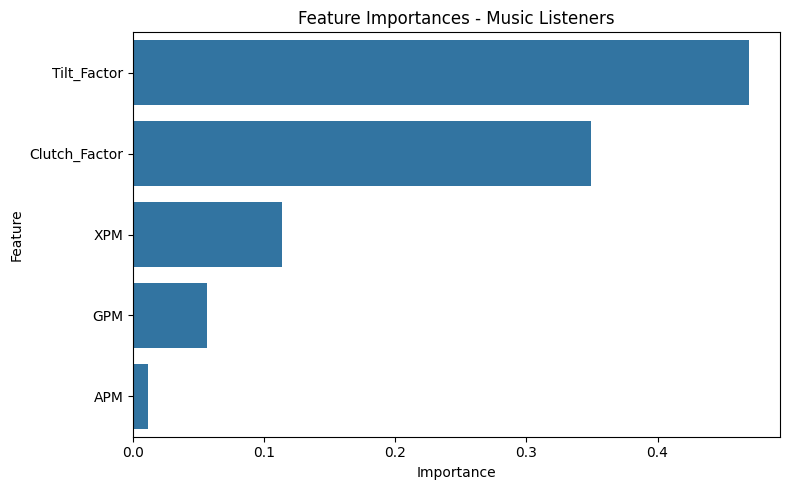


--- Linear Regression (Non-Music Listeners) ---
R²: 0.981589107714887
MSE: 2.977183670386614
MAE: 1.436931433147403
Coefficients:
APM: -0.1068
GPM: 0.8481
XPM: -0.3363
Clutch_Factor: 0.2427
Tilt_Factor: 12.4876

--- Random Forest (Non-Music Listeners) ---
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
R²: 0.9713394245214737
MSE: 4.63463671272182
MAE: 1.6442094338634283


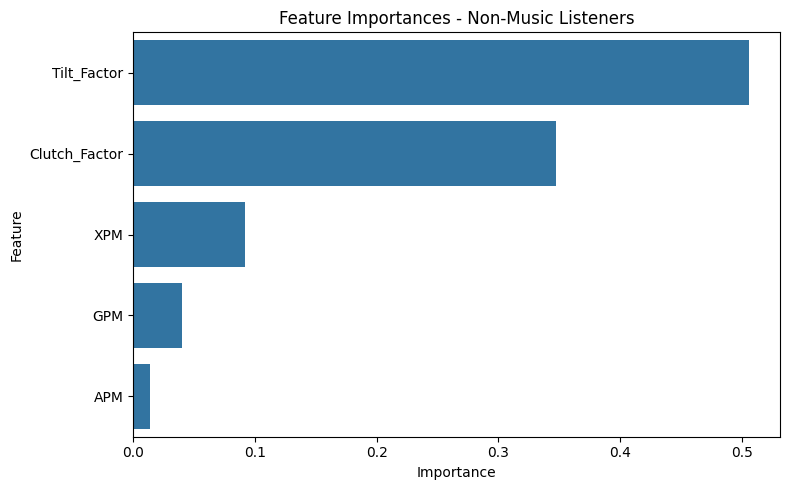

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor']
target = 'Performance Score'

def train_and_evaluate(df, group_name):
    X = df[features]
    y = df[target]

    # Optional: Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)

    print(f"\n--- Linear Regression ({group_name}) ---")
    print("R²:", r2_score(y_test, y_pred_lin))
    print("MSE:", mean_squared_error(y_test, y_pred_lin))
    print("MAE:", mean_absolute_error(y_test, y_pred_lin))

    print("Coefficients:")
    for feature, coef in zip(features, lin_reg.coef_):
        print(f"{feature}: {coef:.4f}")

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10],
        'max_features': ['sqrt']
    }
    grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred_rf = grid.best_estimator_.predict(X_test)

    print(f"\n--- Random Forest ({group_name}) ---")
    print("Best Parameters:", grid.best_params_)
    print("R²:", r2_score(y_test, y_pred_rf))
    print("MSE:", mean_squared_error(y_test, y_pred_rf))
    print("MAE:", mean_absolute_error(y_test, y_pred_rf))

    # Plot feature importance
    importances = grid.best_estimator_.feature_importances_
    imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=imp_df)
    plt.title(f"Feature Importances - {group_name}")
    plt.tight_layout()
    plt.show()

# Run for both groups
train_and_evaluate(music_yes, "Music Listeners")
train_and_evaluate(music_no, "Non-Music Listeners")


**6. Overfitting Check**

In [ ]:
# Classification

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train, y_train_cls)

train_acc_log = accuracy_score(y_train_cls, log_clf.predict(X_train))
test_acc_log = accuracy_score(y_test_cls, log_clf.predict(X_test))
cv_log = cross_val_score(log_clf, X_train, y_train_cls, cv=5)

print(" Logistic Regression")
print(f"Train Accuracy: {train_acc_log:.2f}")
print(f"Test Accuracy: {test_acc_log:.2f}")
print(f"CV Mean Accuracy: {cv_log.mean():.2f}")
print(f"Overfit Gap (Train - Test): {train_acc_log - test_acc_log:.2f}\n")
print(classification_report(y_test_cls, log_clf.predict(X_test)))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_cls)

train_acc_rf = accuracy_score(y_train_cls, rf_clf.predict(X_train))
test_acc_rf = accuracy_score(y_test_cls, rf_clf.predict(X_test))
cv_rf = cross_val_score(rf_clf, X_train, y_train_cls, cv=5)

print("\n Random Forest Classifier")
print(f"Train Accuracy: {train_acc_rf:.2f}")
print(f"Test Accuracy: {test_acc_rf:.2f}")
print(f"CV Mean Accuracy: {cv_rf.mean():.2f}")
print(f"Overfit Gap (Train - Test): {train_acc_rf - test_acc_rf:.2f}\n")
print(classification_report(y_test_cls, rf_clf.predict(X_test)))

 Logistic Regression
Train Accuracy: 0.82
Test Accuracy: 0.85
CV Mean Accuracy: 0.81
Overfit Gap (Train - Test): -0.03

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        50
           1       0.80      0.92      0.86        49

    accuracy                           0.85        99
   macro avg       0.86      0.85      0.85        99
weighted avg       0.86      0.85      0.85        99


 Random Forest Classifier
Train Accuracy: 1.00
Test Accuracy: 0.90
CV Mean Accuracy: 0.86
Overfit Gap (Train - Test): 0.10

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.88      0.92      0.90        49

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



In [ ]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# LINEAR REGRESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reg)

print("\n Linear Regression:")
print("Train R²:", r2_score(y_train_reg, lin_reg.predict(X_train)))
print("Test R²:", r2_score(y_test_reg, lin_reg.predict(X_test)))
print("Train MSE:", mean_squared_error(y_train_reg, lin_reg.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test_reg, lin_reg.predict(X_test)))

# RANDOM FOREST REGRESSOR
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train_reg)

print("\n Random Forest Regressor:")
print("Train R²:", r2_score(y_train_reg, rf_reg.predict(X_train)))
print("Test R²:", r2_score(y_test_reg, rf_reg.predict(X_test)))
print("Train MSE:", mean_squared_error(y_train_reg, rf_reg.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test_reg, rf_reg.predict(X_test)))



 Linear Regression:
Train R²: 0.9803955047910636
Test R²: 0.9796113351909097
Train MSE: 3.316524136013138
Test MSE: 3.449442875036491

 Random Forest Regressor:
Train R²: 0.997763122937584
Test R²: 0.9849210488068979
Train MSE: 0.37841610751677285
Test MSE: 2.5511224615786787


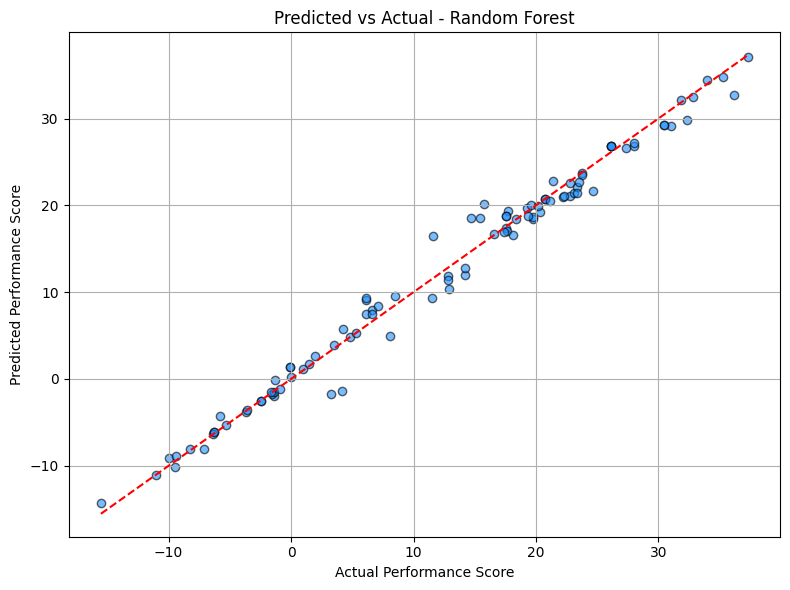

In [ ]:
# Predicted vs Actual of Random Forest Regressor
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, color='dodgerblue', alpha=0.6, edgecolor='k')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.savefig("predicted_vs_actual.png", dpi=300)
plt.show()


**7. Clustering Analysis**

In [ ]:
# Helper Functions
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def run_kmeans(X, n_clusters=3, random_state=42):
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = model.fit_predict(X)
    return model, labels

def label_clusters(df, labels, label_col):
    df[label_col] = labels
    return df

def evaluate_clustering(X, labels, model):
    print("Inertia:", model.inertia_)
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Cluster Sizes:", pd.Series(labels).value_counts())
    return


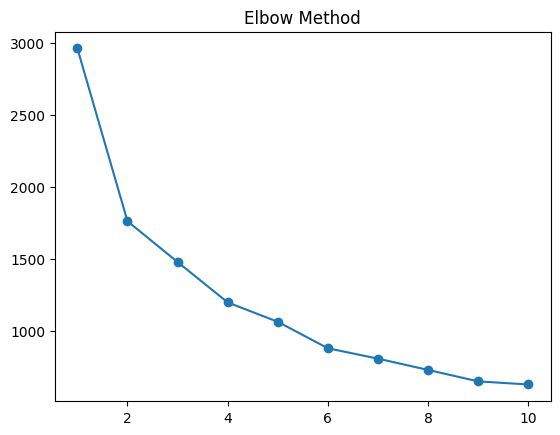

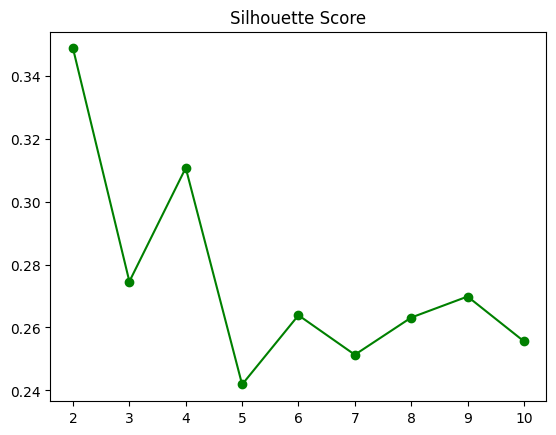

In [ ]:
# Elbow & Silhouette (Global)

# Elbow and silhouette for full scaled set
X_scaled_all = StandardScaler().fit_transform(
    df[['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']].dropna()
)

# Elbow
wcss = [KMeans(n_clusters=k, random_state=42).fit(X_scaled_all).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o'); plt.title("Elbow Method"); plt.show()

# Silhouette
scores = [
    silhouette_score(X_scaled_all, KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled_all))
    for k in range(2, 11)
]
plt.plot(range(2, 11), scores, marker='o', color='green'); plt.title("Silhouette Score"); plt.show()


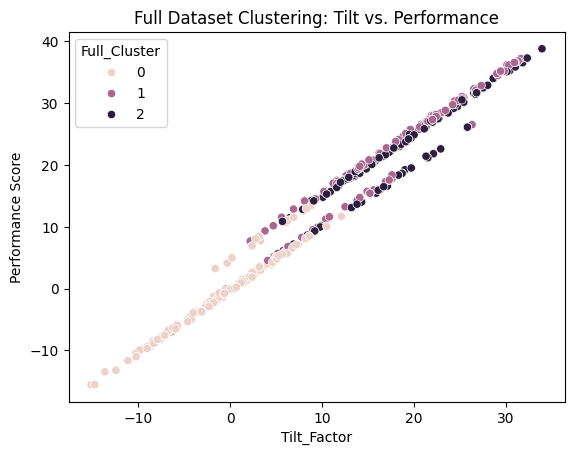

In [ ]:
# Clustering on Full Dataset
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
df_clustered = df.dropna(subset=cluster_features).copy()
X_scaled = StandardScaler().fit_transform(df_clustered[cluster_features])

kmeans_all, labels_all = run_kmeans(X_scaled)
df_clustered = label_clusters(df_clustered, labels_all, 'Full_Cluster')

# Visualization
sns.scatterplot(data=df_clustered, x='Tilt_Factor', y='Performance Score', hue='Full_Cluster')
plt.title("Full Dataset Clustering: Tilt vs. Performance"); plt.show()



Full Dataset Cluster Profiles:
                   APM       GPM       XPM  Clutch_Factor  Tilt_Factor  \
Full_Cluster                                                             
0            -0.154517 -0.675724 -0.751922       0.943680    -0.628169   
1             0.523204  1.359875  1.160550       5.741993    16.995349   
2            -0.092740 -0.138505  0.069200       2.772453    18.132237   

              Performance Score  
Full_Cluster                     
0                     -0.459119  
1                     21.479424  
2                     21.875883  


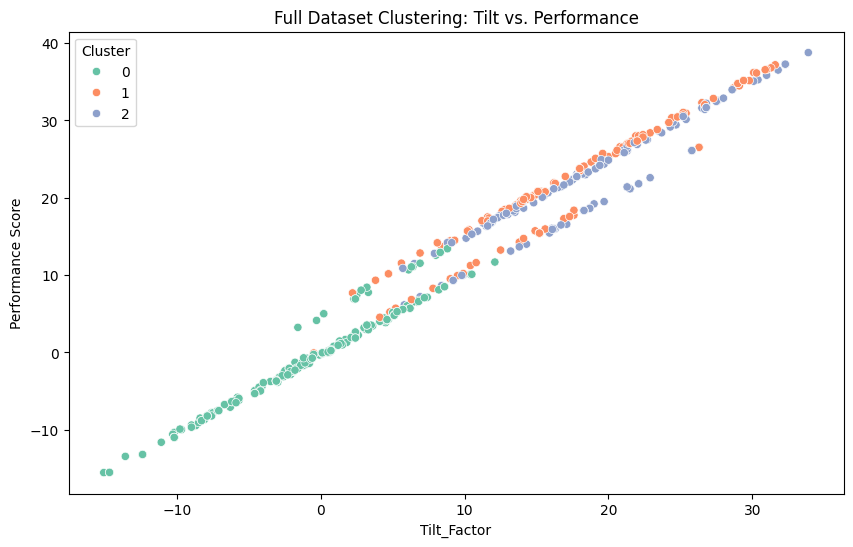


Please assign labels for Full Dataset clusters:
Label for Full Dataset Cluster 0: High Tilter (Underperformer)
Label for Full Dataset Cluster 1: Balanced (Neutral) 
Label for Full Dataset Cluster 2: Low/No Tilter (Overperformer) 


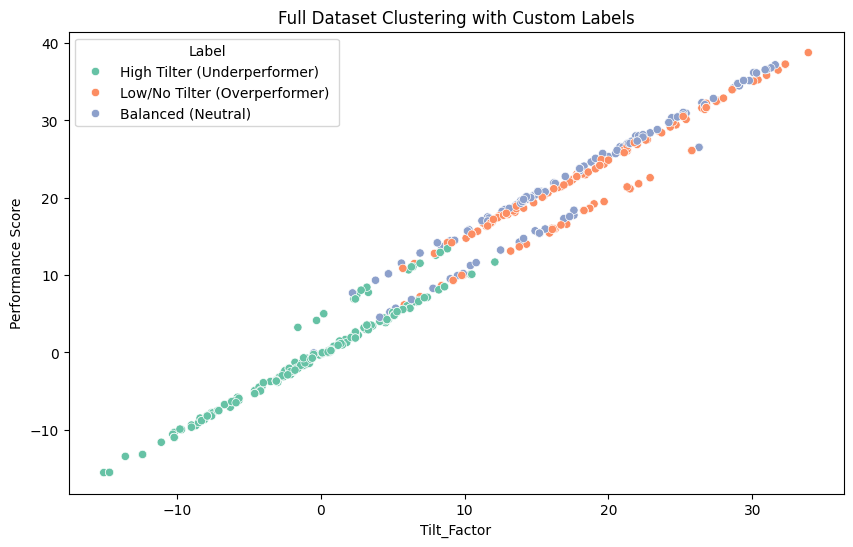

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to run KMeans
def run_kmeans(X, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X)
    return kmeans, labels

# Function to assign cluster labels
def label_clusters(df, labels, label_column):
    df[label_column] = labels
    return df

# Cluster features
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
df_clustered = df.dropna(subset=cluster_features).copy()

# Scale the data
X_scaled = StandardScaler().fit_transform(df_clustered[cluster_features])

# Run KMeans
kmeans_all, labels_all = run_kmeans(X_scaled)
df_clustered = label_clusters(df_clustered, labels_all, 'Full_Cluster')

# Display cluster profiles
print("\nFull Dataset Cluster Profiles:")
print(df_clustered.groupby('Full_Cluster')[cluster_features].mean())

# Initial plot with cluster numbers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='Tilt_Factor', y='Performance Score', hue='Full_Cluster', palette="Set2")
plt.title("Full Dataset Clustering: Tilt vs. Performance")
plt.legend(title="Cluster")
plt.show()

# Prompt for manual labeling
print("\nPlease assign labels for Full Dataset clusters:")
full_cluster_labels = {}
for cluster in sorted(df_clustered['Full_Cluster'].unique()):
    label = input(f"Label for Full Dataset Cluster {cluster}: ")
    full_cluster_labels[cluster] = label
df_clustered['Full_Cluster_Label'] = df_clustered['Full_Cluster'].map(full_cluster_labels)

# Final plot with custom labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='Tilt_Factor', y='Performance Score', hue='Full_Cluster_Label', palette="Set2")
plt.title("Full Dataset Clustering with Custom Labels")
plt.legend(title="Label")
plt.show()



Music Listeners Cluster Profiles:
              APM       GPM       XPM  Clutch_Factor  Tilt_Factor  \
Cluster                                                             
0        0.805305  0.952995  0.789948       6.743325    16.974194   
1       -0.020779  0.235454  0.362016       2.789879    17.558537   
2       -0.235499 -0.780809 -0.819615       0.950310    -0.783495   

         Performance Score  Genre_Electronic  Genre_Hip-Hop  \
Cluster                                                       
0                21.806337          0.000000       0.000000   
1                20.539076          0.390244       0.219512   
2                -0.543202          0.058252       0.155340   

         Genre_Latin Music (Perreo)  Genre_Metal  Genre_Pop  Genre_Rock  \
Cluster                                                                   
0                          0.016129     0.387097   0.290323    0.064516   
1                          0.158537     0.000000   0.048780    0.012195   
2  

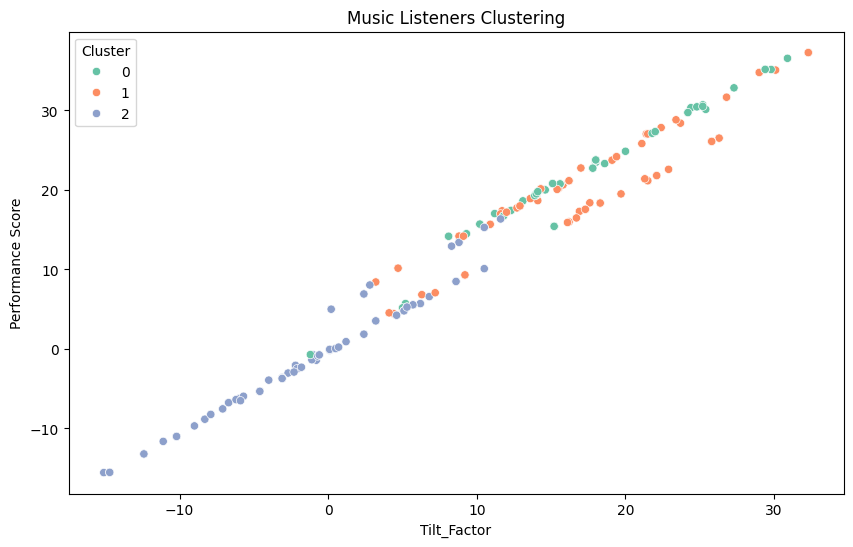


Please assign labels for Music Listeners clusters:
Label for Music Cluster 0: Balanced (Neutral)  
Label for Music Cluster 1: Low/No Tilter (Overperformer)
Label for Music Cluster 2: High Tilter (Underperformer)

Non-Music Listeners Cluster Profiles:
              APM       GPM       XPM  Clutch_Factor  Tilt_Factor  \
Cluster                                                             
0       -0.192678 -0.639846 -0.737713       1.010561     0.446491   
1       -0.372791  0.706854  0.786215       2.793192    16.893258   
2        1.174084  0.511473  0.453510       5.786310    19.290909   

         Performance Score  Genre_Electronic  Genre_Hip-Hop  \
Cluster                                                       
0                 0.948912               0.0            0.0   
1                20.971543               0.0            0.0   
2                23.711296               0.0            0.0   

         Genre_Latin Music (Perreo)  Genre_Metal  Genre_Pop  Genre_Rock  \
Cluster    

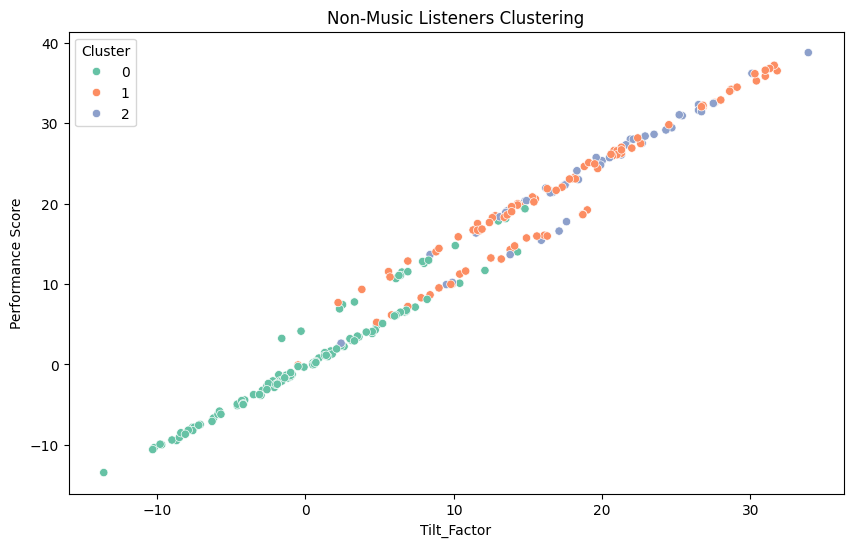


Please assign labels for Non-Music Listeners clusters:
Label for Non-Music Cluster 0: High Tilter (Underperformer)
Label for Non-Music Cluster 1: Balanced (Neutral) 
Label for Non-Music Cluster 2: Low/No Tilter (Overperformer) 


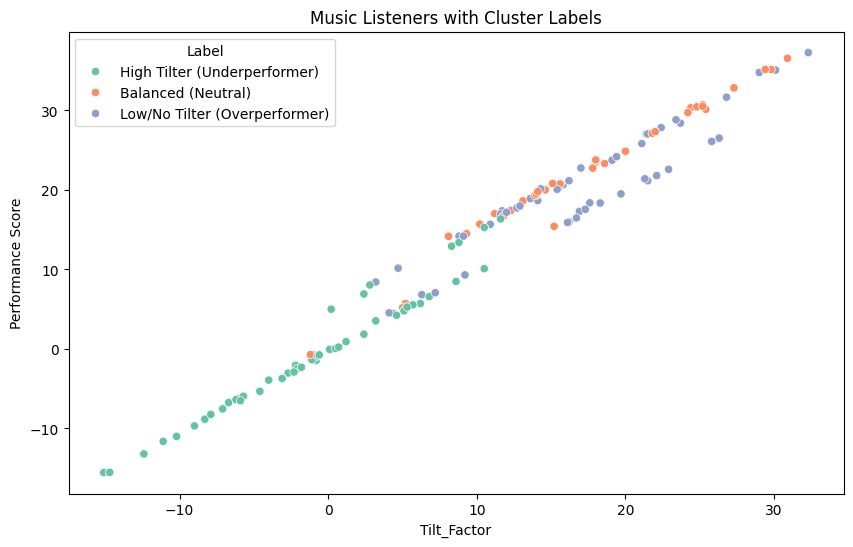

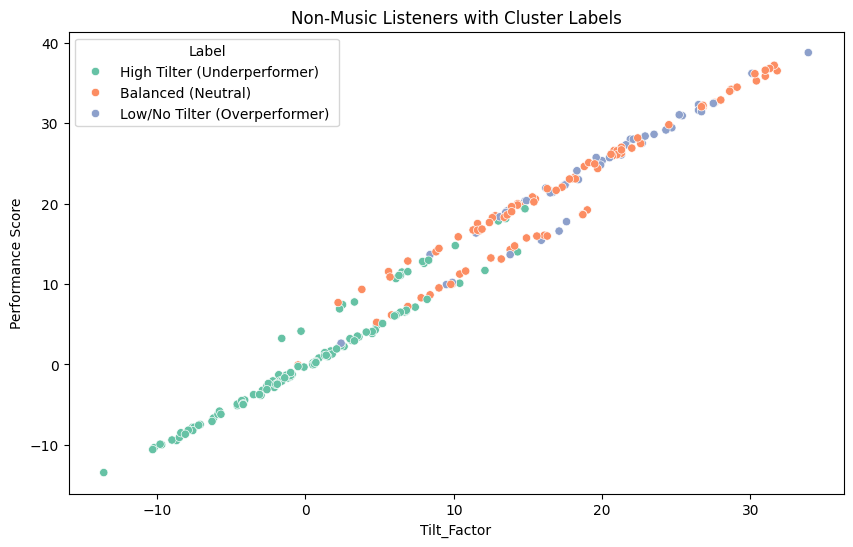

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define features and genre columns
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
genre_cols = ['Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
              'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap']

# Palette for clusters
palette = sns.color_palette("Set2", n_colors=3)

# Split dataset
music_listeners = df[df['Music Listened'] == 1].copy()
non_music_listeners = df[df['Music Listened'] == 0].copy()

# Cluster features
cluster_features_with_genres = cluster_features + genre_cols

# Standardize features
scaler = StandardScaler()
X_music = scaler.fit_transform(music_listeners[cluster_features_with_genres].dropna())
X_non_music = scaler.fit_transform(non_music_listeners[cluster_features_with_genres].dropna())

# Apply KMeans
kmeans_music = KMeans(n_clusters=3, random_state=42)
music_listeners.loc[:, 'Cluster'] = kmeans_music.fit_predict(X_music)

kmeans_non_music = KMeans(n_clusters=3, random_state=42)
non_music_listeners.loc[:, 'Cluster'] = kmeans_non_music.fit_predict(X_non_music)

# Cluster profile summaries
print("\nMusic Listeners Cluster Profiles:")
print(music_listeners.groupby('Cluster')[cluster_features_with_genres + ['Tilt_Factor', 'Performance Score']].mean())

# Show Music Listeners plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=music_listeners, x='Tilt_Factor', y='Performance Score', hue='Cluster', palette=palette)
plt.title("Music Listeners Clustering")
plt.legend(title="Cluster")
plt.show()

# Prompt for Music Listeners labels
print("\nPlease assign labels for Music Listeners clusters:")
music_labels = {}
for cluster in sorted(music_listeners['Cluster'].unique()):
    label = input(f"Label for Music Cluster {cluster}: ")
    music_labels[cluster] = label
music_listeners['Cluster_Label'] = music_listeners['Cluster'].map(music_labels)

# Cluster profile summaries for Non-Music
print("\nNon-Music Listeners Cluster Profiles:")
print(non_music_listeners.groupby('Cluster')[cluster_features_with_genres + ['Tilt_Factor', 'Performance Score']].mean())

# Show Non-Music Listeners plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_music_listeners, x='Tilt_Factor', y='Performance Score', hue='Cluster', palette=palette)
plt.title("Non-Music Listeners Clustering")
plt.legend(title="Cluster")
plt.show()

# Prompt for Non-Music Listeners labels
print("\nPlease assign labels for Non-Music Listeners clusters:")
non_music_labels = {}
for cluster in sorted(non_music_listeners['Cluster'].unique()):
    label = input(f"Label for Non-Music Cluster {cluster}: ")
    non_music_labels[cluster] = label
non_music_listeners['Cluster_Label'] = non_music_listeners['Cluster'].map(non_music_labels)

# Final labeled plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=music_listeners, x='Tilt_Factor', y='Performance Score', hue='Cluster_Label', palette=palette)
plt.title("Music Listeners with Cluster Labels")
plt.legend(title="Label")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_music_listeners, x='Tilt_Factor', y='Performance Score', hue='Cluster_Label', palette=palette)
plt.title("Non-Music Listeners with Cluster Labels")
plt.legend(title="Label")
plt.show()


In [15]:
# FullData
df_cluster = df_clustered.copy()

if 'Full_Cluster' not in df_cluster.columns:
    raise ValueError("The DataFrame does not contain 'Full_Cluster'. Please run clustering first.")

# Performance Summary
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
performance_profiles = df_cluster.groupby("Full_Cluster_Label")[cluster_features].mean().round(2)
print("\nCluster Performance Profiles:")
print(performance_profiles)

# % Music Listeners per Cluster
if 'Music Listened' in df_cluster.columns:
    music_percent = df_cluster.groupby("Full_Cluster_Label")["Music Listened"].mean().round(2) * 100
    print("\n% of Players in Each Cluster Who Listened to Music:")
    print(music_percent)



Cluster Performance Profiles:
                                 APM   GPM   XPM  Clutch_Factor  Tilt_Factor  \
Full_Cluster_Label                                                             
Balanced (Neutral)              0.52  1.36  1.16           5.74        17.00   
High Tilter (Underperformer)   -0.15 -0.68 -0.75           0.94        -0.63   
Low/No Tilter (Overperformer)  -0.09 -0.14  0.07           2.77        18.13   

                                Performance Score  
Full_Cluster_Label                                 
Balanced (Neutral)                          21.48  
High Tilter (Underperformer)                -0.46  
Low/No Tilter (Overperformer)               21.88  

% of Players in Each Cluster Who Listened to Music:
Full_Cluster_Label
Balanced (Neutral)                53.0
High Tilter (Underperformer)      50.0
Low/No Tilter (Overperformer)     47.0
Name: Music Listened, dtype: float64


In [16]:
# Music Listeners Only
df_cluster = music_listeners.copy()

if 'Cluster' not in df_cluster.columns:
    raise ValueError("The DataFrame does not contain 'Cluster'. Please run clustering first.")

# Assign labels if not already mapped
if 'Cluster_Label' not in df_cluster.columns:
    print("\nPlease assign labels for Music Clusters:")
    cluster_labels = {}
    for cluster in sorted(df_cluster['Cluster'].unique()):
        label = input(f"Label for Cluster {cluster}: ")
        cluster_labels[cluster] = label
    df_cluster['Cluster_Label'] = df_cluster['Cluster'].map(cluster_labels)

# Average % who listen to music (will be 100% for all since it's filtered)
music_by_cluster = df_cluster.groupby("Cluster_Label")["Music Listened"].mean().round(2) * 100
print("\n% Music Listeners per Cluster (Music Group Only):")
print(music_by_cluster)

# Genre columns
genre_cols = [
    'Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
    'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap'
]
genre_means = df_cluster.groupby("Cluster_Label")[genre_cols].mean().round(2) * 100
print("\n% of Players by Genre per Cluster:")
print(genre_means)

# Top genres per cluster
for label in genre_means.index:
    top_genres = genre_means.loc[label].sort_values(ascending=False).head(2)
    print(f"\nTop Genres in '{label}':")
    print(top_genres)

# Performance profiles
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
performance_profiles = df_cluster.groupby("Cluster_Label")[cluster_features].mean().round(2)
print("\nCluster Performance Profiles (Music Listeners):")
print(performance_profiles)



% Music Listeners per Cluster (Music Group Only):
Cluster_Label
Balanced (Neutral)               100.0
High Tilter (Underperformer)     100.0
Low/No Tilter (Overperformer)    100.0
Name: Music Listened, dtype: float64

% of Players by Genre per Cluster:
                               Genre_Electronic  Genre_Hip-Hop  \
Cluster_Label                                                    
Balanced (Neutral)                          0.0            0.0   
High Tilter (Underperformer)                6.0           16.0   
Low/No Tilter (Overperformer)              39.0           22.0   

                               Genre_Latin Music (Perreo)  Genre_Metal  \
Cluster_Label                                                            
Balanced (Neutral)                                    2.0         39.0   
High Tilter (Underperformer)                         11.0         11.0   
Low/No Tilter (Overperformer)                        16.0          0.0   

                               Genre_Pop  G

In [17]:
# Non-Music Listeners Only
df_cluster = non_music_listeners.copy()

if 'Cluster' not in df_cluster.columns:
    raise ValueError("The DataFrame does not contain 'Cluster'. Please run clustering first.")

# Assign labels if not already mapped
if 'Cluster_Label' not in df_cluster.columns:
    print("\nPlease assign labels for Non-Music Clusters:")
    cluster_labels = {}
    for cluster in sorted(df_cluster['Cluster'].unique()):
        label = input(f"Label for Cluster {cluster}: ")
        cluster_labels[cluster] = label
    df_cluster['Cluster_Label'] = df_cluster['Cluster'].map(cluster_labels)

# Genre columns
genre_cols = [
    'Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
    'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap'
]
genre_means = df_cluster.groupby("Cluster_Label")[genre_cols].mean().round(2) * 100
print("\n% of Players by Genre per Cluster:")
print(genre_means)

# Top genres per cluster
for label in genre_means.index:
    top_genres = genre_means.loc[label].sort_values(ascending=False).head(2)
    print(f"\nTop Genres in '{label}':")
    print(top_genres)

# Performance profiles
cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']
performance_profiles = df_cluster.groupby("Cluster_Label")[cluster_features].mean().round(2)
print("\nCluster Performance Profiles (Non-Music Listeners):")
print(performance_profiles)



% of Players by Genre per Cluster:
                                Genre_Electronic  Genre_Hip-Hop  \
Cluster_Label                                                     
Balanced (Neutral)                           0.0            0.0   
High Tilter (Underperformer)                 0.0            0.0   
Low/No Tilter (Overperformer)                0.0            0.0   

                                Genre_Latin Music (Perreo)  Genre_Metal  \
Cluster_Label                                                             
Balanced (Neutral)                                     0.0          0.0   
High Tilter (Underperformer)                           0.0          0.0   
Low/No Tilter (Overperformer)                          0.0          0.0   

                                Genre_Pop  Genre_Rock  Genre_Trap/Rap  
Cluster_Label                                                          
Balanced (Neutral)                    0.0         0.0             0.0  
High Tilter (Underperformer)        

**8. Genre-Specific Clustering: Performance Score vs Tilt/Clutch Factor**


--- Clustering for Electronic ---


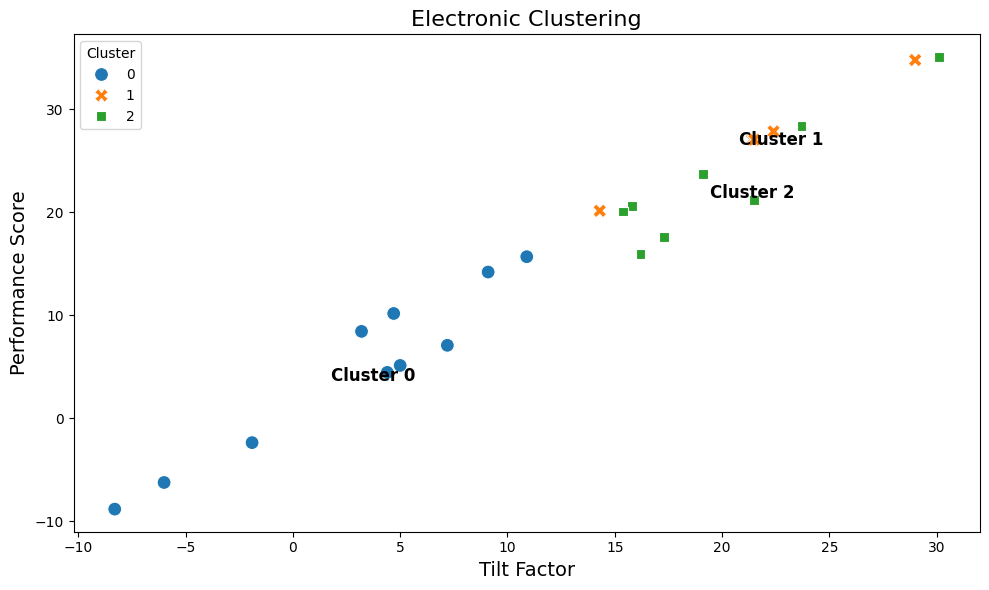

Enter tag for Cluster 0: High Tilter (Underperformer)
Enter tag for Cluster 1: Balanced (Neutral) 
Enter tag for Cluster 2: Low/No Tilter (Overperformer) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.42 -0.21 -0.19           1.27         1.79               3.57
1             -0.37  1.66  1.64           3.62        20.78              26.49
2              0.31 -0.41 -0.16           2.91        19.43              21.42
   Cluster_Label                             Tag  Count
0              0    High Tilter (Underperformer)     16
1              2  Low/No Tilter (Overperformer)      14
2              1             Balanced (Neutral)       8

--- Clustering for Hip-Hop ---


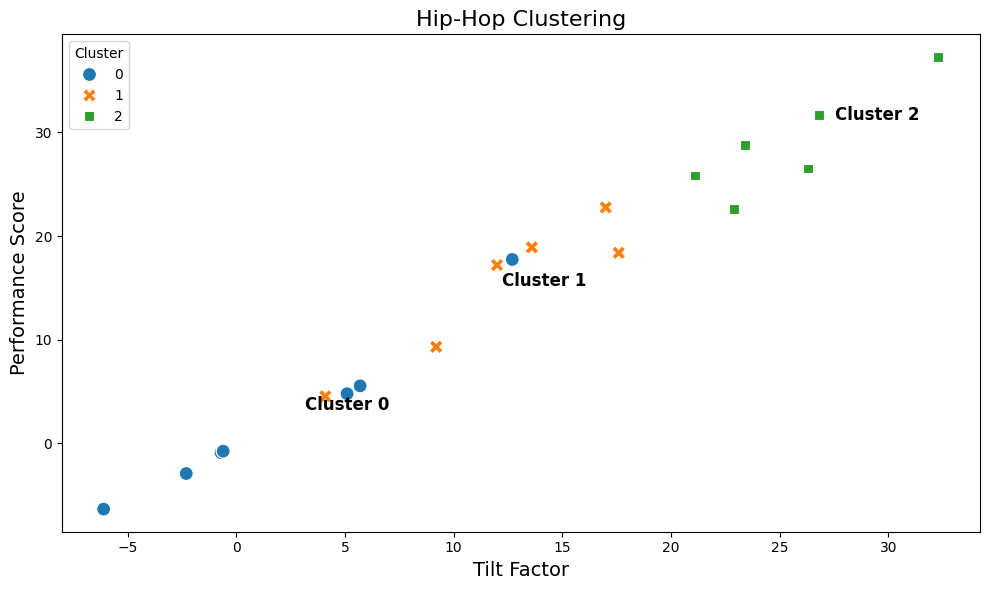

Enter tag for Cluster 0: High Tilter (Underperformer)
Enter tag for Cluster 1: Balanced (Neutral) 
Enter tag for Cluster 2: Low/No Tilter (Overperformer) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.20 -0.59 -0.53           1.20         3.17               3.21
1             -0.47  1.04  0.92           2.21        12.25              15.19
2             -0.02 -0.09  0.33           4.26        27.53              31.17
   Cluster_Label                             Tag  Count
0              0    High Tilter (Underperformer)     17
1              2  Low/No Tilter (Overperformer)      11
2              1             Balanced (Neutral)       6

--- Clustering for Latin Music ---


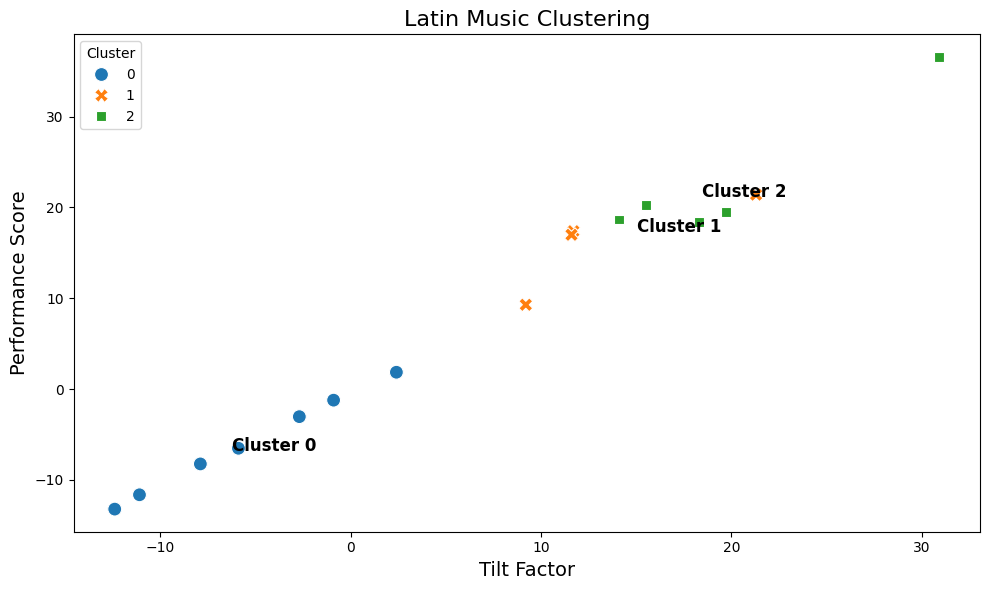

Enter tag for Cluster 0: High Tilter (Underperformer)
Enter tag for Cluster 1: Balanced (Neutral) 
Enter tag for Cluster 2: Low/No Tilter (Overperformer) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.13 -1.24 -1.35           0.60        -6.25              -6.80
1              1.31  0.53  0.96           2.08        15.02              17.29
2              0.84 -0.25  0.20           4.11        18.46              21.17
   Cluster_Label                             Tag  Count
0              0    High Tilter (Underperformer)     11
1              2  Low/No Tilter (Overperformer)       9
2              1             Balanced (Neutral)       5

--- Clustering for Metal ---


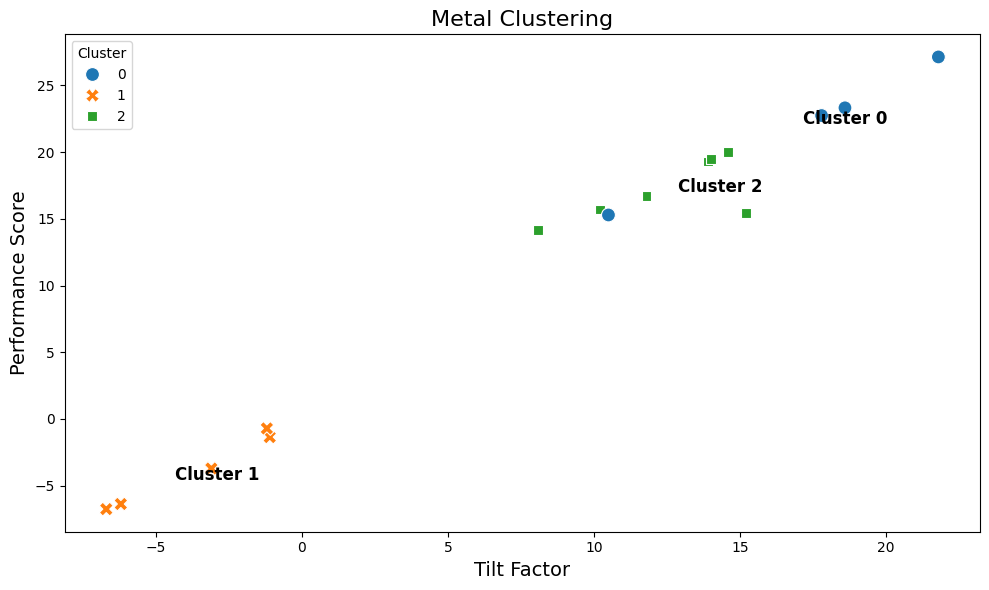

Enter tag for Cluster 0: Low/No Tilter (Overperformer) 
Enter tag for Cluster 1: High Tilter (Underperformer)
Enter tag for Cluster 2: Balanced (Neutral)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.63 -0.11  0.10           2.10        17.16              22.13
1              0.16 -0.39 -0.97           0.61        -4.36              -4.59
2              1.24  1.02  0.77           2.78        12.88              17.05
   Cluster_Label                             Tag  Count
0              2              Balanced (Neutral)     16
1              1    High Tilter (Underperformer)     10
2              0  Low/No Tilter (Overperformer)       9

--- Clustering for Pop ---


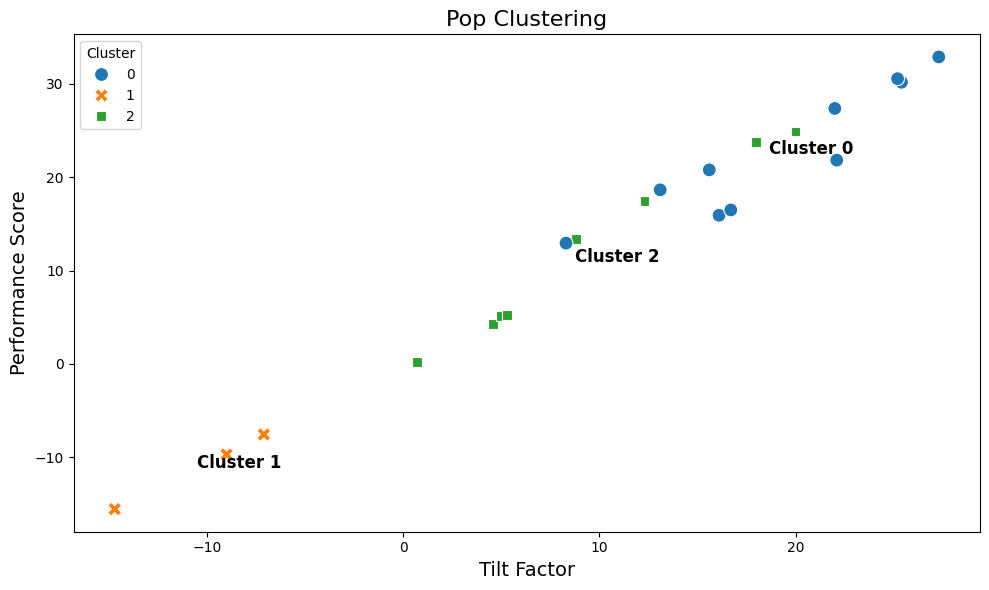

Enter tag for Cluster 0: Low/No Tilter (Overperformer) 
Enter tag for Cluster 1: High Tilter (Underperformer)
Enter tag for Cluster 2: Balanced (Neutral) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.19  0.19  0.18           9.51        18.64              22.48
1             -0.42 -1.53 -1.38           0.27       -10.52             -11.17
2              0.92 -0.05 -0.03           1.88         8.76              10.96
   Cluster_Label                             Tag  Count
0              2             Balanced (Neutral)      18
1              0  Low/No Tilter (Overperformer)      16
2              1    High Tilter (Underperformer)      5

--- Clustering for Rock ---


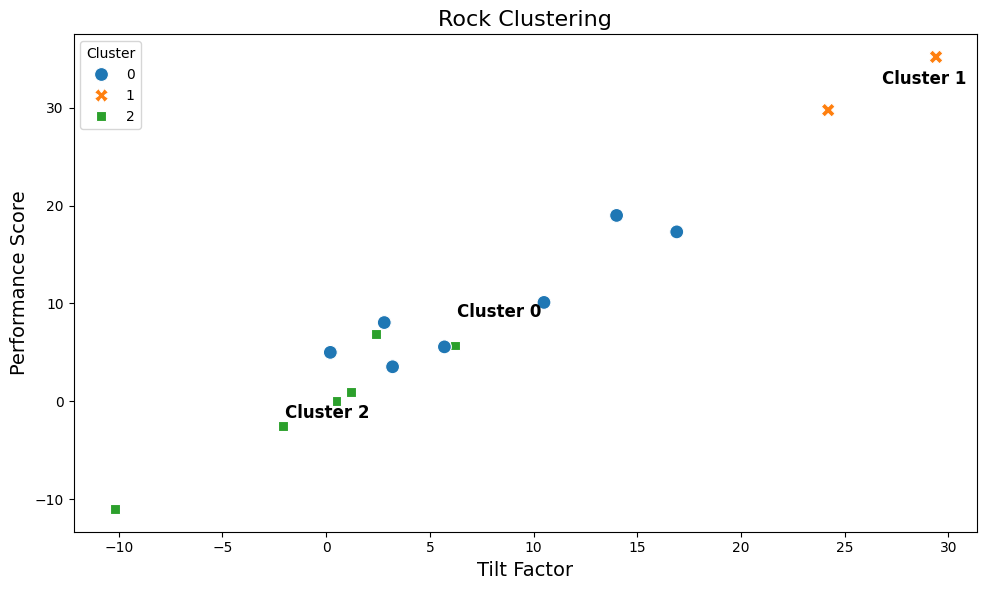

Enter tag for Cluster 0: Balanced (Neutral) 
Enter tag for Cluster 1: Low/No Tilter (Overperformer) 
Enter tag for Cluster 2: High Tilter (Underperformer)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.38  0.08  0.13           1.53         6.30               8.56
1              0.81  1.63  1.15           7.45        26.80              32.46
2             -0.46 -1.29 -1.21           0.85        -1.97              -1.75
   Cluster_Label                             Tag  Count
0              2    High Tilter (Underperformer)     13
1              0             Balanced (Neutral)       9
2              1  Low/No Tilter (Overperformer)       4

--- Clustering for Trap/Rap ---


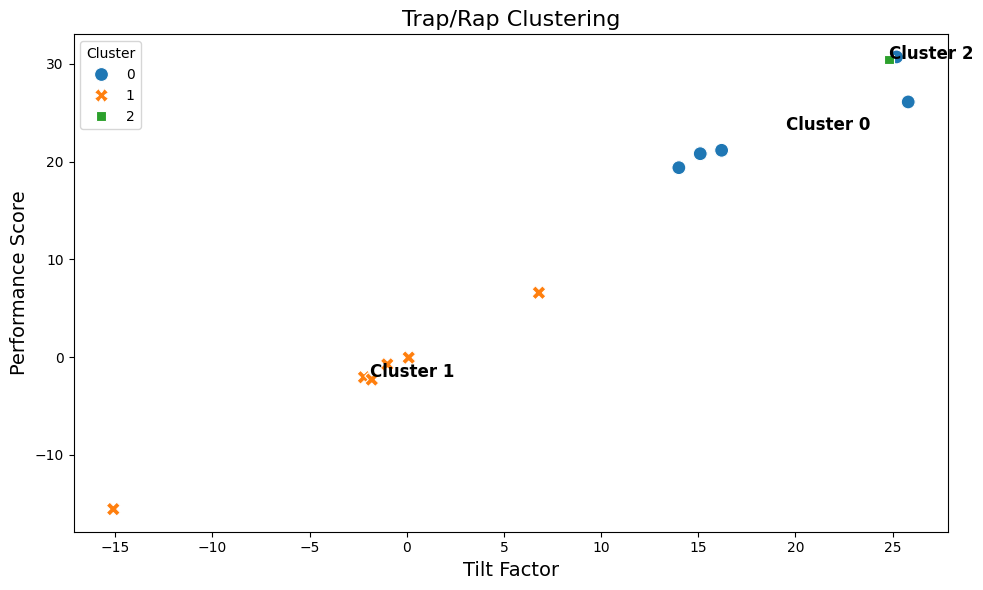

Enter tag for Cluster 0: Balanced (Neutral) 
Enter tag for Cluster 1: High Tilter (Underperformer)
Enter tag for Cluster 2: Low/No Tilter (Overperformer) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0              0.39  1.01  0.47           2.87        19.51              23.22
1             -0.28 -0.28 -0.27           0.81        -1.91              -2.03
2              0.99  1.54  1.46          24.80        24.80              30.46
   Cluster_Label                             Tag  Count
0              0             Balanced (Neutral)      12
1              1    High Tilter (Underperformer)      8
2              2  Low/No Tilter (Overperformer)       2

--- Clustering for Electronic ---


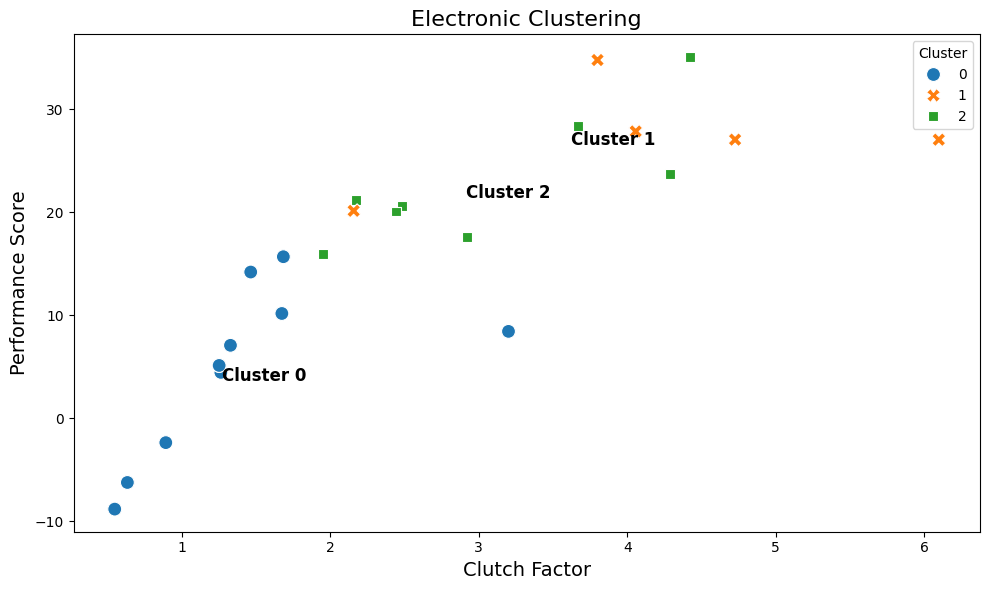

Enter tag for Cluster 0: Low Clutch (Underperformer)
Enter tag for Cluster 1: High Clutch (Overperformer)
Enter tag for Cluster 2: Balanced (Neutral) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.42 -0.21 -0.19           1.27         1.79               3.57
1             -0.37  1.66  1.64           3.62        20.78              26.49
2              0.31 -0.41 -0.16           2.91        19.43              21.42
   Cluster_Label                          Tag  Count
0              0  Low Clutch (Underperformer)     16
1              2          Balanced (Neutral)      14
2              1  High Clutch (Overperformer)      8

--- Clustering for Hip-Hop ---


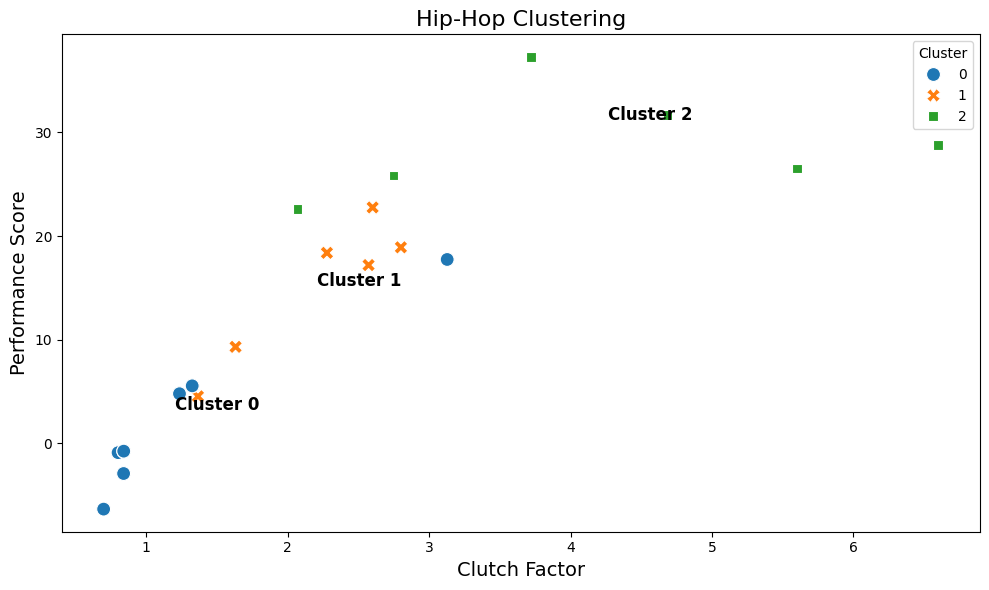

Enter tag for Cluster 0: Low Clutch (Underperformer)
Enter tag for Cluster 1: Balanced (Neutral) 
Enter tag for Cluster 2: High Clutch (Overperformer)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.20 -0.59 -0.53           1.20         3.17               3.21
1             -0.47  1.04  0.92           2.21        12.25              15.19
2             -0.02 -0.09  0.33           4.26        27.53              31.17
   Cluster_Label                          Tag  Count
0              0  Low Clutch (Underperformer)     17
1              2  High Clutch (Overperformer)     11
2              1          Balanced (Neutral)       6

--- Clustering for Latin Music ---


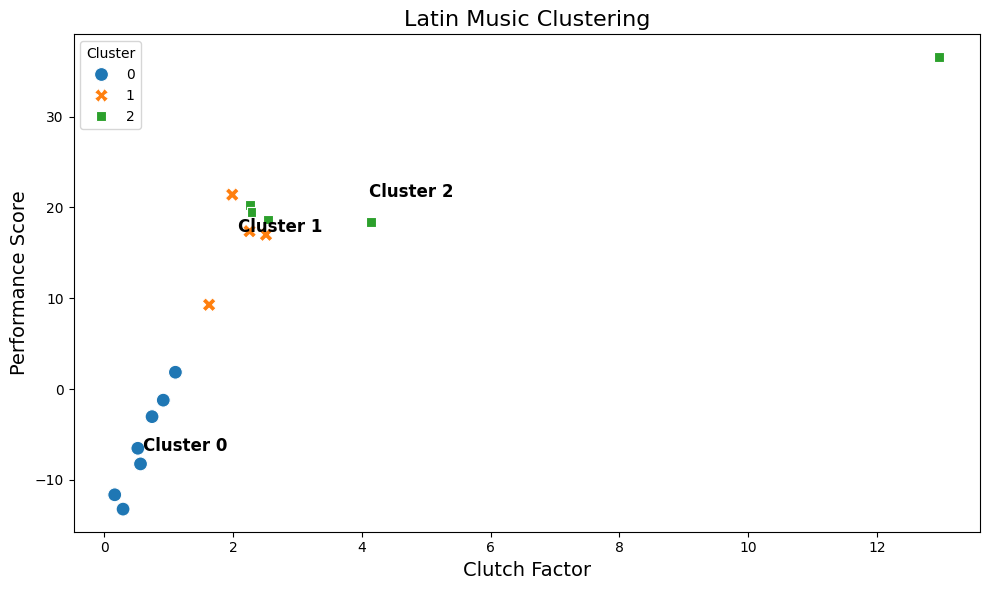

Enter tag for Cluster 0: Low Clutch (Underperformer)
Enter tag for Cluster 1: High Clutch (Overperformer)
Enter tag for Cluster 2: Balanced (Neutral) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.13 -1.24 -1.35           0.60        -6.25              -6.80
1              1.31  0.53  0.96           2.08        15.02              17.29
2              0.84 -0.25  0.20           4.11        18.46              21.17
   Cluster_Label                          Tag  Count
0              0  Low Clutch (Underperformer)     11
1              2          Balanced (Neutral)       9
2              1  High Clutch (Overperformer)      5

--- Clustering for Metal ---


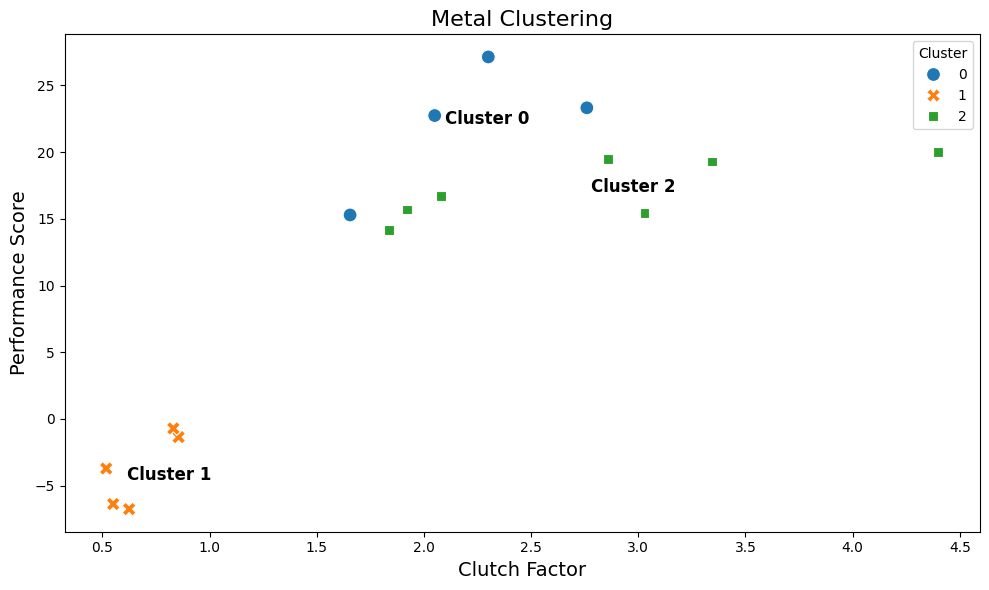

Enter tag for Cluster 0: High Clutch (Overperformer)
Enter tag for Cluster 1: Low Clutch (Underperformer)
Enter tag for Cluster 2: Balanced (Neutral) 
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.63 -0.11  0.10           2.10        17.16              22.13
1              0.16 -0.39 -0.97           0.61        -4.36              -4.59
2              1.24  1.02  0.77           2.78        12.88              17.05
   Cluster_Label                          Tag  Count
0              2          Balanced (Neutral)      16
1              1  Low Clutch (Underperformer)     10
2              0  High Clutch (Overperformer)      9

--- Clustering for Pop ---


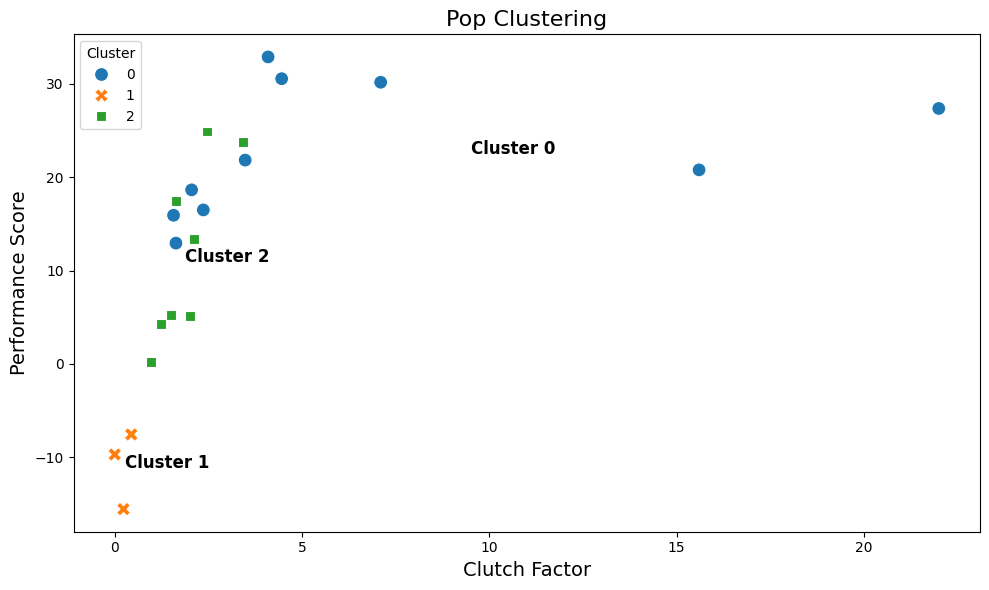

Enter tag for Cluster 0: High Clutch (Overperformer)
Enter tag for Cluster 1: Low Clutch (Underperformer)
Enter tag for Cluster 2: Balanced (Neutral)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.19  0.19  0.18           9.51        18.64              22.48
1             -0.42 -1.53 -1.38           0.27       -10.52             -11.17
2              0.92 -0.05 -0.03           1.88         8.76              10.96
   Cluster_Label                          Tag  Count
0              2           Balanced (Neutral)     18
1              0  High Clutch (Overperformer)     16
2              1  Low Clutch (Underperformer)      5

--- Clustering for Rock ---


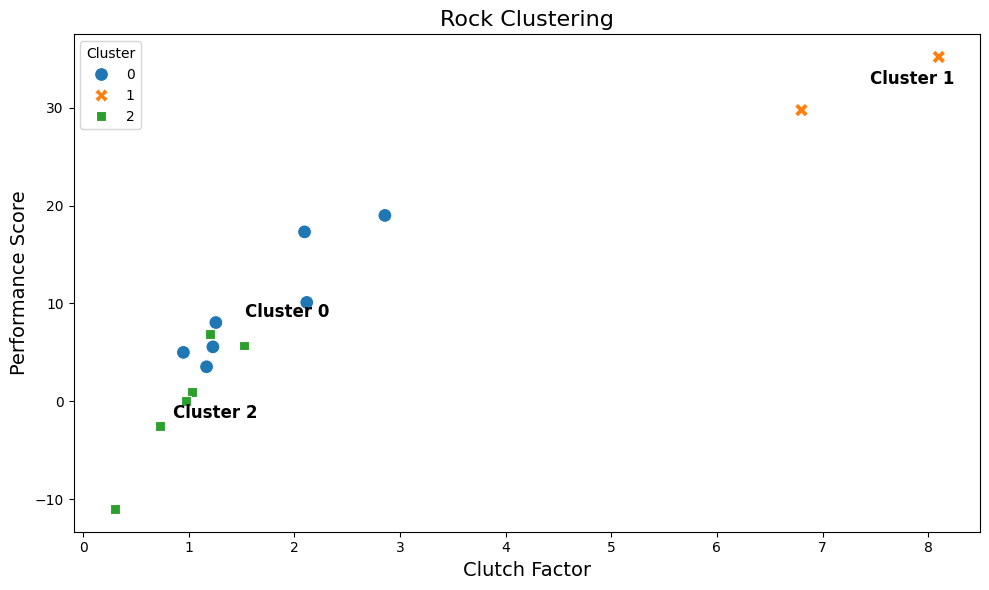

Enter tag for Cluster 0: Balanced (Neutral)
Enter tag for Cluster 1: High Clutch (Overperformer)
Enter tag for Cluster 2: Low Clutch (Underperformer)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0             -0.38  0.08  0.13           1.53         6.30               8.56
1              0.81  1.63  1.15           7.45        26.80              32.46
2             -0.46 -1.29 -1.21           0.85        -1.97              -1.75
   Cluster_Label                          Tag  Count
0              2  Low Clutch (Underperformer)     13
1              0           Balanced (Neutral)      9
2              1  High Clutch (Overperformer)      4

--- Clustering for Trap/Rap ---


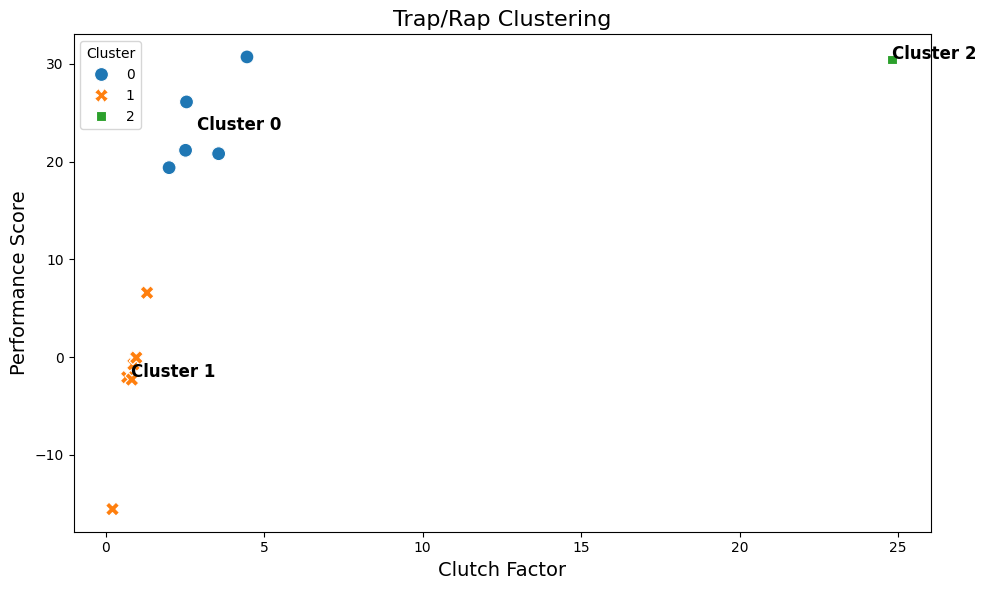

Enter tag for Cluster 0: Balanced (Neutral) 
Enter tag for Cluster 1: Low Clutch (Underperformer)
Enter tag for Cluster 2: High Clutch (Overperformer)
                APM   GPM   XPM  Clutch_Factor  Tilt_Factor  Performance Score
Cluster_Label                                                                 
0              0.39  1.01  0.47           2.87        19.51              23.22
1             -0.28 -0.28 -0.27           0.81        -1.91              -2.03
2              0.99  1.54  1.46          24.80        24.80              30.46
   Cluster_Label                          Tag  Count
0              0          Balanced (Neutral)      12
1              1  Low Clutch (Underperformer)      8
2              2  High Clutch (Overperformer)      2


In [ ]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

os.makedirs("outputs_genre_clustering", exist_ok=True)

cluster_features = ['APM', 'GPM', 'XPM', 'Clutch_Factor', 'Tilt_Factor', 'Performance Score']

genre_list = [
    'Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
    'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap'
]

def cluster_genre_players(df, genre_col, x_axis, y_axis):
    genre_display = genre_col.replace("Genre_", "").replace(" (Perreo)", "")
    genre_safe = re.sub(r'[^\w\s-]', '', genre_display).replace(" ", "_")

    print(f"\n--- Clustering for {genre_display} ---")

    genre_df = df[df[genre_col] == 1].copy()
    genre_df = genre_df.dropna(subset=cluster_features)

    if genre_df.shape[0] < 5:
        print(f"Insufficient data for {genre_display}. Skipping.")
        return

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(genre_df[cluster_features])

    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    genre_df['Cluster_Label'] = cluster_labels

    centroids = kmeans.cluster_centers_

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=genre_df,
        x=x_axis,
        y=y_axis,
        hue='Cluster_Label',
        palette='tab10',
        style='Cluster_Label',
        s=100
    )
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    x_idx, y_idx = cluster_features.index(x_axis), cluster_features.index(y_axis)
    for i, coord in enumerate(centroids):
        plt.text(coord[x_idx], coord[y_idx], f"Cluster {i}", fontsize=12, weight='bold', color='black')

    plt.title(f"{genre_display} Clustering", fontsize=16)
    plt.xlabel(x_axis.replace("_", " "), fontsize=14)
    plt.ylabel(y_axis.replace("_", " "), fontsize=14)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.savefig(f"outputs_genre_clustering/{genre_safe}_{x_axis}_vs_{y_axis}_clusters.png")
    plt.show()

    # Manual tagging after viewing the graph
    cluster_names = {}
    for i in range(n_clusters):
        tag = input(f"Enter tag for Cluster {i}: ")
        cluster_names[i] = tag

    genre_df['Tag'] = genre_df['Cluster_Label'].map(cluster_names)

    cluster_profiles = genre_df.groupby('Cluster_Label')[cluster_features].mean().round(2)
    profile_path = f"outputs_genre_clustering/{genre_safe}_cluster_profiles.csv"
    cluster_profiles.to_csv(profile_path)
    print(cluster_profiles)

    print(genre_df[['Cluster_Label', 'Tag']].value_counts().reset_index(name='Count'))

for genre in genre_list:
    cluster_genre_players(music_yes, genre, x_axis='Tilt_Factor', y_axis='Performance Score')

for genre in genre_list:
    cluster_genre_players(music_yes, genre, x_axis='Clutch_Factor', y_axis='Performance Score')